In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\zahee\\Desktop\\Data Science\\Project ExcelR\\telecommunications_churn.csv")
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [3]:
df.drop(['voice_mail_plan','day_charge','evening_charge','night_charge', 'international_charge',
        'account_length','day_calls','night_calls','evening_calls'],axis=1, inplace=True)
df

,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,international_calls,total_charge,churn
0,25,265.1,197.4,244.7,10.0,1,0,3,75.56,0
1,26,161.6,195.5,254.4,13.7,1,0,3,59.24,0
2,0,243.4,121.2,162.6,12.2,0,0,5,62.29,0
3,0,299.4,61.9,196.9,6.6,2,1,7,66.80,0
4,0,166.7,148.3,186.9,10.1,3,1,3,52.09,0
...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,215.5,279.1,9.9,2,0,6,60.10,0
3329,0,231.1,153.4,191.3,9.6,3,0,4,63.53,0
3330,0,180.8,288.8,191.9,14.1,2,0,6,67.74,0
3331,0,213.8,159.6,139.2,5.0,2,1,10,57.53,0


In [4]:
x=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [5]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(x)

In [6]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [7]:
classifier.coef_

array([[-0.37291873,  0.3403357 ,  0.18949286,  0.09204303,  0.21144569,
         0.67153989,  0.6003851 , -0.22173284,  0.41302632]])

In [8]:
beta_coeff= pd.Series(classifier.coef_[0])
beta_coeff

0   -0.372919
1    0.340336
2    0.189493
3    0.092043
4    0.211446
5    0.671540
6    0.600385
7   -0.221733
8    0.413026
dtype: float64

In [10]:
test=x.columns
dataframe=pd.DataFrame(test, columns=['Variables'])
dataframe['beta coeff']=beta_coeff
dataframe

,Variables,beta coeff
0,voice_mail_messages,-0.372919
1,day_mins,0.340336
2,evening_mins,0.189493
3,night_mins,0.092043
4,international_mins,0.211446
5,customer_service_calls,0.671540
6,international_plan,0.600385
7,international_calls,-0.221733
8,total_charge,0.413026


In [11]:
classifier.predict_proba(X)

array([[0.86847344, 0.13152656],
       [0.94846967, 0.05153033],
       [0.94386559, 0.05613441],
       ...,
       [0.77634101, 0.22365899],
       [0.73862932, 0.26137068],
       [0.89019807, 0.10980193]])

In [12]:
classifier.score(X,Y)

0.8634863486348635

In [13]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
table=pd.DataFrame({'Actual': Y,'Predicted':y_pred})
table

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
3328,0,0
3329,0,0
3330,0,0
3331,0,0


In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y,y_pred)
cm

array([[2775,   75],
       [ 380,  103]], dtype=int64)

### Thus we see that due to the class imbalance, model is not able to predict '1' outcome as False Negatives are 380 out of total 483 1's in the dataset. Hence, we will need to resample the classes.

# Upsampling minority class

In [16]:
from sklearn.utils import resample
df_majority = df[df['churn']==0]
df_minority = df[df['churn']==1]

In [17]:
df_minority_upsample = resample(df_minority, replace=True, n_samples=2850,random_state=123)

In [18]:
df_upsample = pd.concat([df_minority_upsample,df_majority])

In [19]:
df_upsample['churn'].value_counts()

1    2850
0    2850
Name: churn, dtype: int64

In [20]:
p=df_upsample.iloc[:,:-1]
q=df_upsample.iloc[:,-1]
P=scale.fit_transform(p)
clf1=LogisticRegression()
clf1.fit(P,q)

LogisticRegression()

In [21]:
clf1.coef_

array([[-0.30326758,  0.43556581,  0.1897986 ,  0.06397997,  0.1903451 ,
         0.97903855,  0.83682216, -0.14181631,  0.4629214 ]])

In [22]:
clf1.score(P,q)

0.7603508771929824

In [23]:
beta_values = pd.Series(clf1.coef_[0])
beta_values

0   -0.303268
1    0.435566
2    0.189799
3    0.063980
4    0.190345
5    0.979039
6    0.836822
7   -0.141816
8    0.462921
dtype: float64

In [24]:
test2= p.columns
frame1= pd.DataFrame(test2, columns=['Variables'])
frame1['beta values']=beta_values
frame1

,Variables,beta values
0,voice_mail_messages,-0.303268
1,day_mins,0.435566
2,evening_mins,0.189799
3,night_mins,0.063980
4,international_mins,0.190345
5,customer_service_calls,0.979039
6,international_plan,0.836822
7,international_calls,-0.141816
8,total_charge,0.462921


In [25]:
clf1.predict_proba(P)

array([[0.05936732, 0.94063268],
       [0.19960732, 0.80039268],
       [0.92886145, 0.07113855],
       ...,
       [0.38100901, 0.61899099],
       [0.23388   , 0.76612   ],
       [0.63329245, 0.36670755]])

In [27]:
ypred = clf1.predict(P)

In [28]:
table_upsample= pd.DataFrame({'Actual': q, 'Predicted': ypred})
table_upsample

,Actual,Predicted
2614,1,1
2700,1,1
2377,1,0
3287,1,0
737,1,1
...,...,...
3328,0,0
3329,0,1
3330,0,1
3331,0,1


# Confusion matrix for upsampled data

In [29]:
cm=confusion_matrix(q,ypred)
cm

array([[2186,  664],
       [ 702, 2148]], dtype=int64)

In [30]:
TN=2186
TP=2148
FN=702
FP=664

# Sensitivity

In [31]:
sensitivity = (TP/(TP+FN))*100
sensitivity

75.36842105263158

# Specificity

In [32]:
specificity = (TN/(TN+FP))*100
specificity

76.70175438596492

# Precision

In [33]:
precision = (TP/(TP+FP))*100
precision

76.38691322901849

# F Score

In [34]:
f_score = (2*precision*sensitivity)/(precision+sensitivity)
f_score

75.87424938184388

# Classification report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(q,ypred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      2850
           1       0.76      0.75      0.76      2850

    accuracy                           0.76      5700
   macro avg       0.76      0.76      0.76      5700
weighted avg       0.76      0.76      0.76      5700



# ROC Curve

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

0.7603508771929824


Text(0, 0.5, 'True Positive Rate')

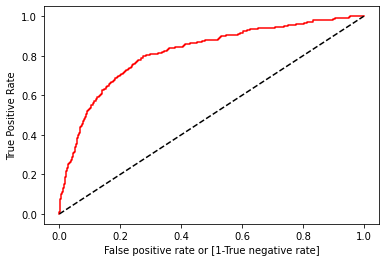

In [37]:
fpr,tpr, thresholds = roc_curve(q,classifier.predict_proba(P)[:,1])

auc= roc_auc_score(q,ypred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr, color='red', label = 'logit model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False positive rate or [1-True negative rate]')
plt.ylabel('True Positive Rate')

# Applying ensemble technique to improve accuracy further

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
# AdaBoost Classifier
kfold=KFold(n_splits=10,random_state=123, shuffle=True)
model= AdaBoostClassifier(n_estimators=10, random_state=123)
score= cross_val_score(model,P,q, cv=kfold)
print(score.mean())

0.8745614035087719


In [40]:
# Random Forest Classifier
kfold=KFold(n_splits=10, random_state=123,shuffle=True)
model=RandomForestClassifier(n_estimators=100, max_features=3)
score=cross_val_score(model,P,q, cv=kfold)
print(score.mean())

0.9984210526315789
